In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X , y = make_classification(n_samples=100,hypercube=False,n_features=2,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class=1,class_sep=10,random_state=2)

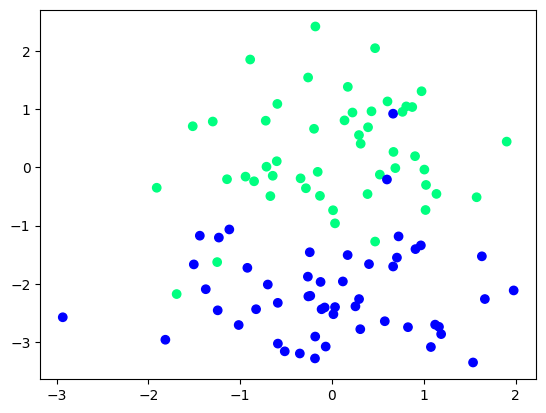

In [5]:

plt.scatter(X[:,0] , X[:,1] , c=y, cmap='winter')
plt.show()

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis = 1) # np.insert(data,index_col,val,axis)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[j] , weights))
        weights = weights + lr * (y[j] - y_hat)*X[j]
        
    return weights[0],weights[1:]

In [8]:
intercept_,coef_ = perceptron(X,y)

In [9]:
print(coef_) # W1 and W2
print(intercept_) # Wo

[0.01129553 0.41267844]
0.30000000000000016


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

(-3.0, 2.0)

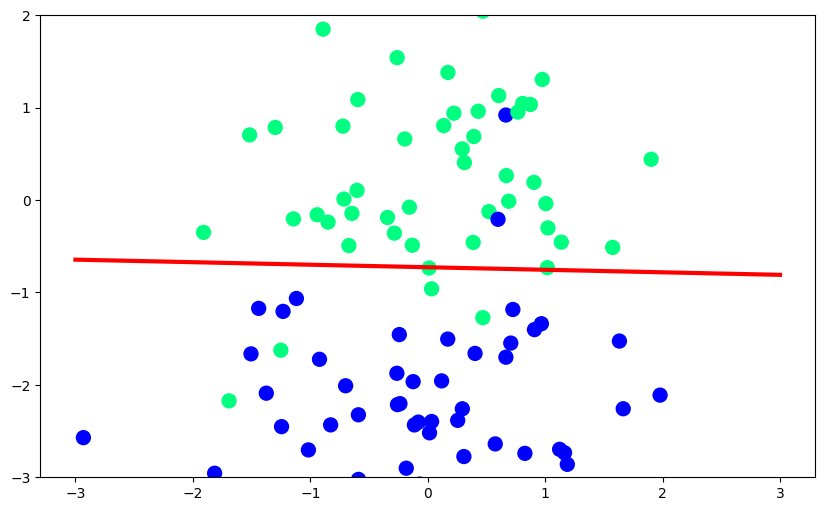

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [12]:
def perceptron_animation(X,y):
    X = np.insert(X , 0 , 1 , axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    m = []
    b = []
    
    for i in range(200):
        
        j = np.random.randint(0 , X.shape[0])
        y_hat = step(np.dot(weights, X[j]))
        
        weights = weights + lr*(y[j] - y_hat)*X[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m ,b

In [13]:
m,b = perceptron_animation(X,y)

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [15]:
m

[-1.0,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.7973135958478247,
 -0.8017280926819549,
 -0.6086030927643777,
 -0.6086030927643777,
 -0.6086030927643777,
 -0.6086030927643777,
 -0.6086030927643777,
 -0.6086030927643777,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.5717529207929776,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.3103057188554551,
 -0.27659242428671504,
 -0.27659242428671504,
 -0.27659242428671504,
 -0.27659242428671504,
 -0.27659242428671504,
 -0.2765924242867150

<IPython.core.display.Javascript object>


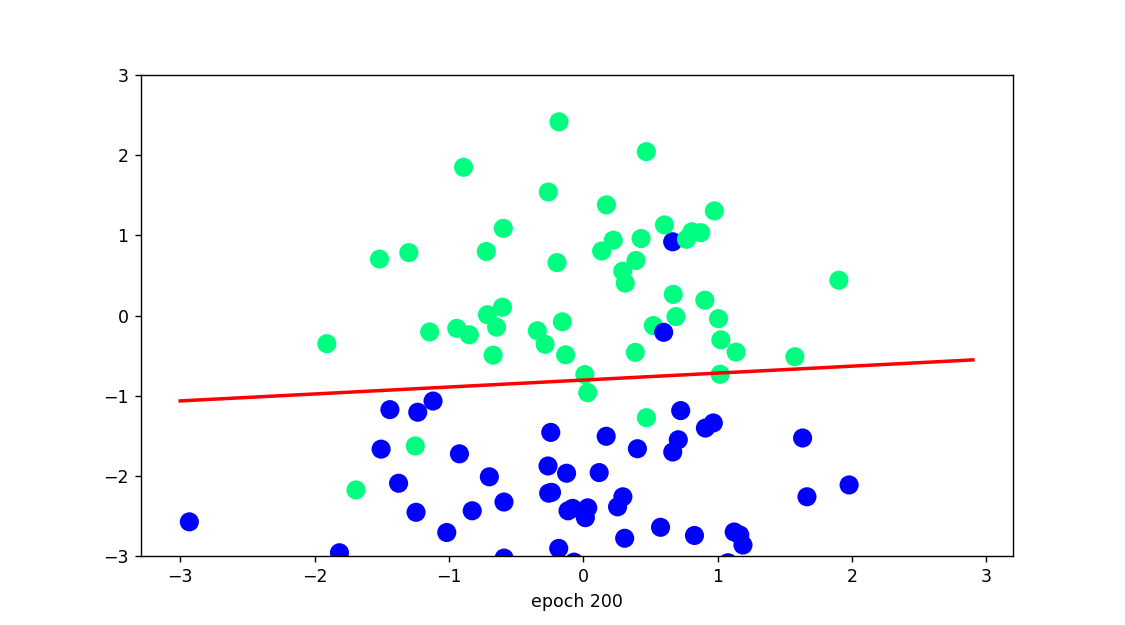

In [17]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=False, frames=200, interval=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

In [ ]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [ ]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
lor.coef_[0][0]

In [ ]:
-0.29656538,  2.23691131